In this notebook, we score gene sets corresponding to region-specific markers of the adult Drosophila midgut.
The lists of differentially expressed genes for each region were generated in a separate analysis available at:
https://github.com/roya-abs/Microarray_AdultMidgut

These gene sets originate from the dataset published in:
“Morphological and Molecular Characterization of Adult Midgut Compartmentalization in Drosophila”
(Buchon et al., 2013).

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
sc.settings.set_figure_params(dpi=80, frameon=False)
sc.set_figure_params(dpi=80)
sc.set_figure_params(figsize=(4, 4))
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.figsize'] = (4, 4)

In [ ]:
import gseapy

In [ ]:
sc.pl.umap(adata, color='leiden_1.4')

In [ ]:
l = ["Crop", "R1", "R2", "R3", "R4", "R5"]
markers = {}

for region in l:
    s = pd.read_csv(f"../../Microarray_AdultMidgut/processed_data/{region}_markers.csv").iloc[:, 0]
    markers[region] = s

In [ ]:
markers

In [ ]:
adata_raw = adata.raw.to_adata()
adata_raw

In [ ]:
adata_raw.X

In [ ]:
sc.pp.normalize_total(adata_raw)

In [ ]:
sc.pp.log1p(adata_raw)

In [ ]:
l = ["Crop", "R1", "R2", "R3", "R4", "R5"]

for region in l:
  sc.tl.score_genes(adata_raw, gene_list=markers[region], score_name=f"{region}_score", use_raw=False)

In [ ]:
adata_raw

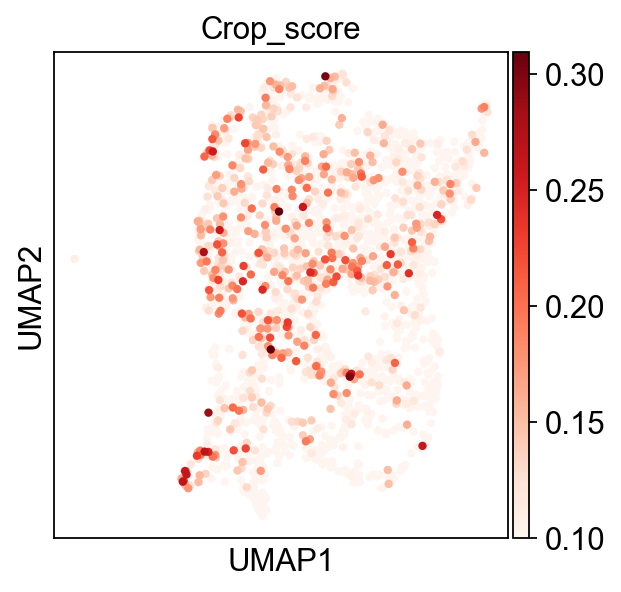

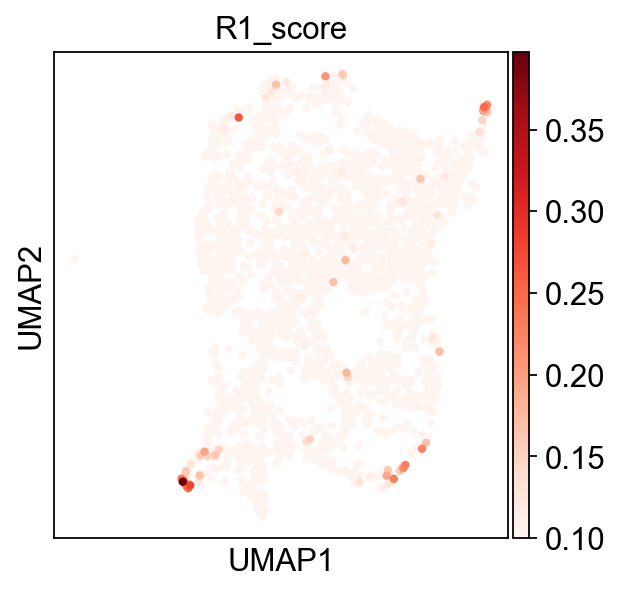

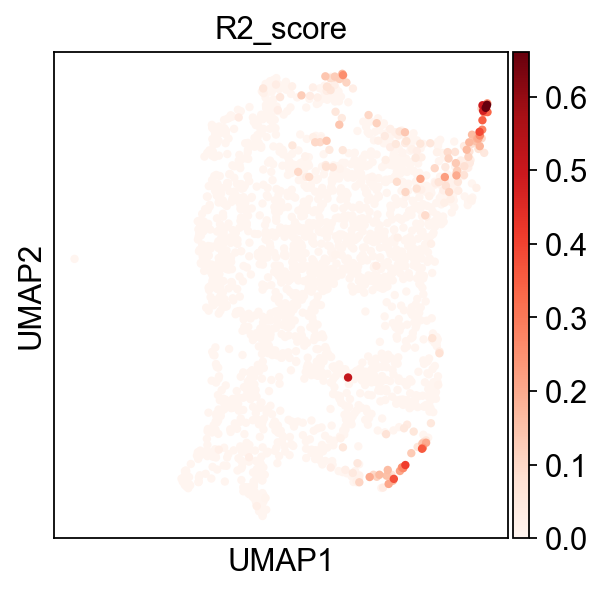

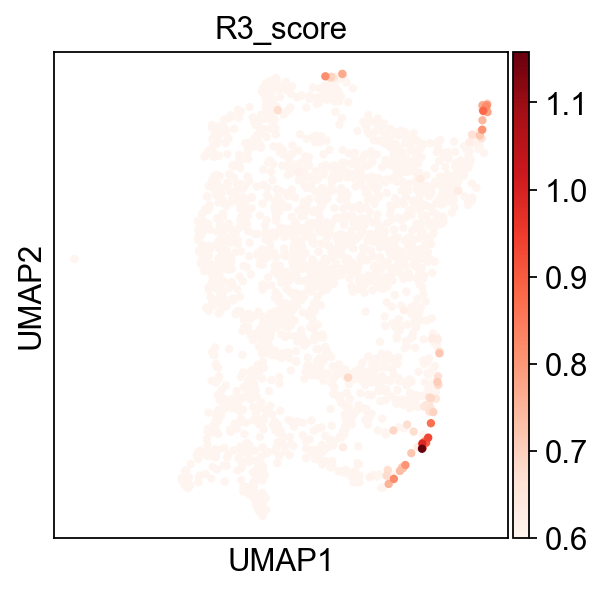

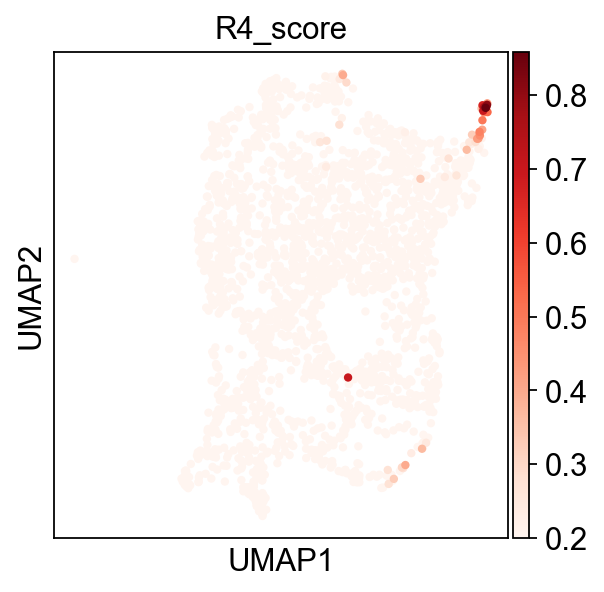

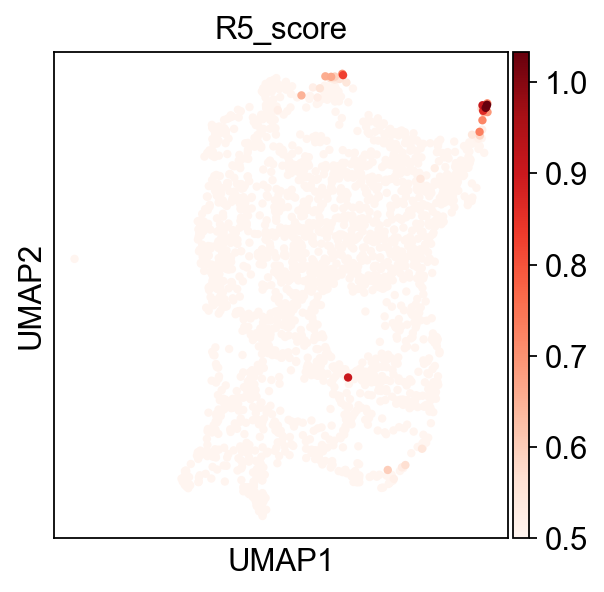

In [25]:
sc.pl.umap(adata_raw, color="Crop_score", vmin=0.1, cmap="Reds")
sc.pl.umap(adata_raw, color="R1_score", vmin=0.1, cmap="Reds")
sc.pl.umap(adata_raw, color="R2_score", vmin=0, cmap="Reds")
sc.pl.umap(adata_raw, color="R3_score", vmin=0.6, cmap="Reds")
sc.pl.umap(adata_raw, color="R4_score", vmin=0.2, cmap="Reds")
sc.pl.umap(adata_raw, color="R5_score", vmin=0.5, cmap="Reds")